<a href="https://colab.research.google.com/github/Axel3D2Y/MACHINE-LEARNING-MODELS-USING-SCIKIT-LEARN/blob/main/Analisis%20Ames_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tareas:

1.  Análisis exploratorio de datos (EDA):
    * Analiza la relación entre las características y el precio de venta.
    * Realiza una inspección de las correlaciones entre las variables. ¿Qué variables están más correlacionadas con el precio de venta?
    * Detecta y trata valores atípicos o missing values.
2.   Ingeniería de características:
    * Crea nuevas características si es necesario. Por ejemplo, agrupa barrios similares o crea interacciones entre variables.
    * Estandariza o normaliza las características que tienen distribuciones muy amplias (como áreas en pies cuadrados).
    * Codifica las variables categóricas como Neighborhood.
3.   Construcción de un modelo predictivo:
    * Usa un modelo de regresión lineal, de bosque aleatorio, o cualquier otro algoritmo de regresión adecuado.
    * Realiza validación cruzada para evaluar el rendimiento del modelo.
    * Ajusta hiperparámetros para mejorar la precisión.
4.   Evaluación del modelo:
    * Evalúa el modelo con métricas como el RMSE (Root Mean Squared Error) o MAE (Mean Absolute Error).
    * Interpreta los coeficientes del modelo (en el caso de la regresión lineal) o la importancia de las características (en el caso de modelos de árboles o bosque aleatorio).













* SalePrice: El precio de venta de la vivienda (variable objetivo).
* OverallQual: Calidad general de la casa.
* GrLivArea: Área de la vivienda (superficie habitable en pies cuadrados).
* GarageCars: Número de coches que caben en el garaje.
* GarageArea: Área del garaje en pies cuadrados.
* TotalBsmtSF: Área total del sótano en pies cuadrados.
* FullBath: Número de baños completos.
* YearBuilt: Año en el que la casa fue construida.
* LotArea: Área total del terreno en pies cuadrados.
* Neighborhood: Barrio donde se encuentra la casa.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from google.colab import sheets
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/AmesHousing.csv')


In [ ]:
#Nos quedamos unicamente con los datos que nos interesan
leaked_data= data[['SalePrice','Overall Qual','Gr Liv Area', 'Garage Area','Total Bsmt SF','Full Bath', 'Year Built','Lot Area','Neighborhood']]
leaked_data.dropna(inplace=True)
leaked_data.head()

<ipython-input-6-b496a1dfac8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaked_data.dropna(inplace=True)


,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Full Bath,Year Built,Lot Area,Neighborhood
0,215000,6,1656,528.0,1080.0,1,1960,31770,NAmes
1,105000,5,896,730.0,882.0,1,1961,11622,NAmes
2,172000,6,1329,312.0,1329.0,1,1958,14267,NAmes
3,244000,7,2110,522.0,2110.0,2,1968,11160,NAmes
4,189900,5,1629,482.0,928.0,2,1997,13830,Gilbert


In [ ]:
#consideramos unicamente los datos numericos
data_num=leaked_data.select_dtypes(include=np.number)
data_num.head(3)

,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Full Bath,Year Built,Lot Area
0,215000,6,1656,528.0,1080.0,1,1960,31770
1,105000,5,896,730.0,882.0,1,1961,11622
2,172000,6,1329,312.0,1329.0,1,1958,14267


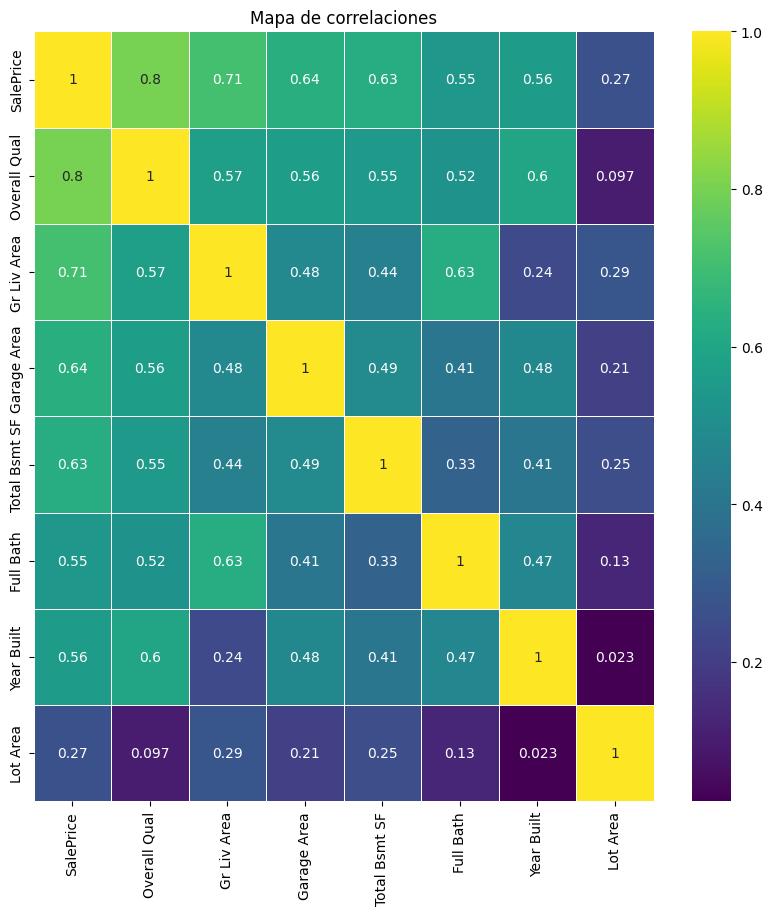

In [ ]:
#Mapa de correlaciones
plt.figure(figsize=(10,10))
plt.title('Mapa de correlaciones')
sns.heatmap(data_num.corr(), cmap='viridis', annot=True, linewidths=0.5 )
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:105: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scout = method(scout_x, scout_y, **kws)
/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


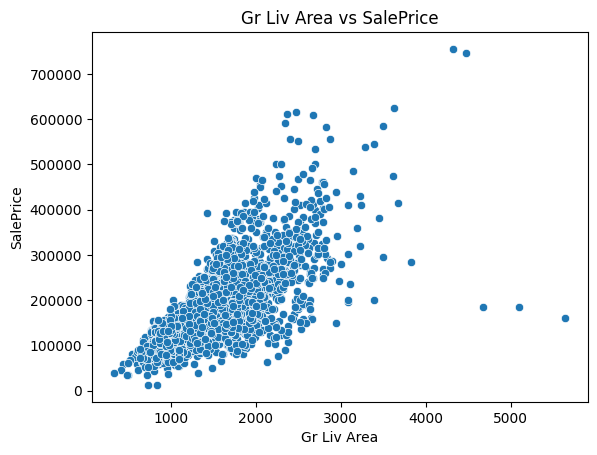

In [ ]:
sns.scatterplot(x= 'Gr Liv Area', y='SalePrice', data=data_num, cmap='red')
plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice')
plt.title('Gr Liv Area vs SalePrice')
plt.show()

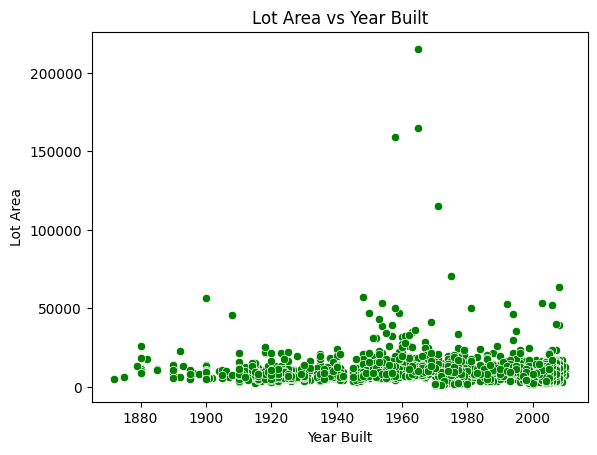

In [ ]:
sns.scatterplot( data=data_num, x='Year Built', y='Lot Area', color='green')
plt.xlabel('Year Built')
plt.ylabel('Lot Area')
plt.title('Lot Area vs Year Built')
plt.show()
#

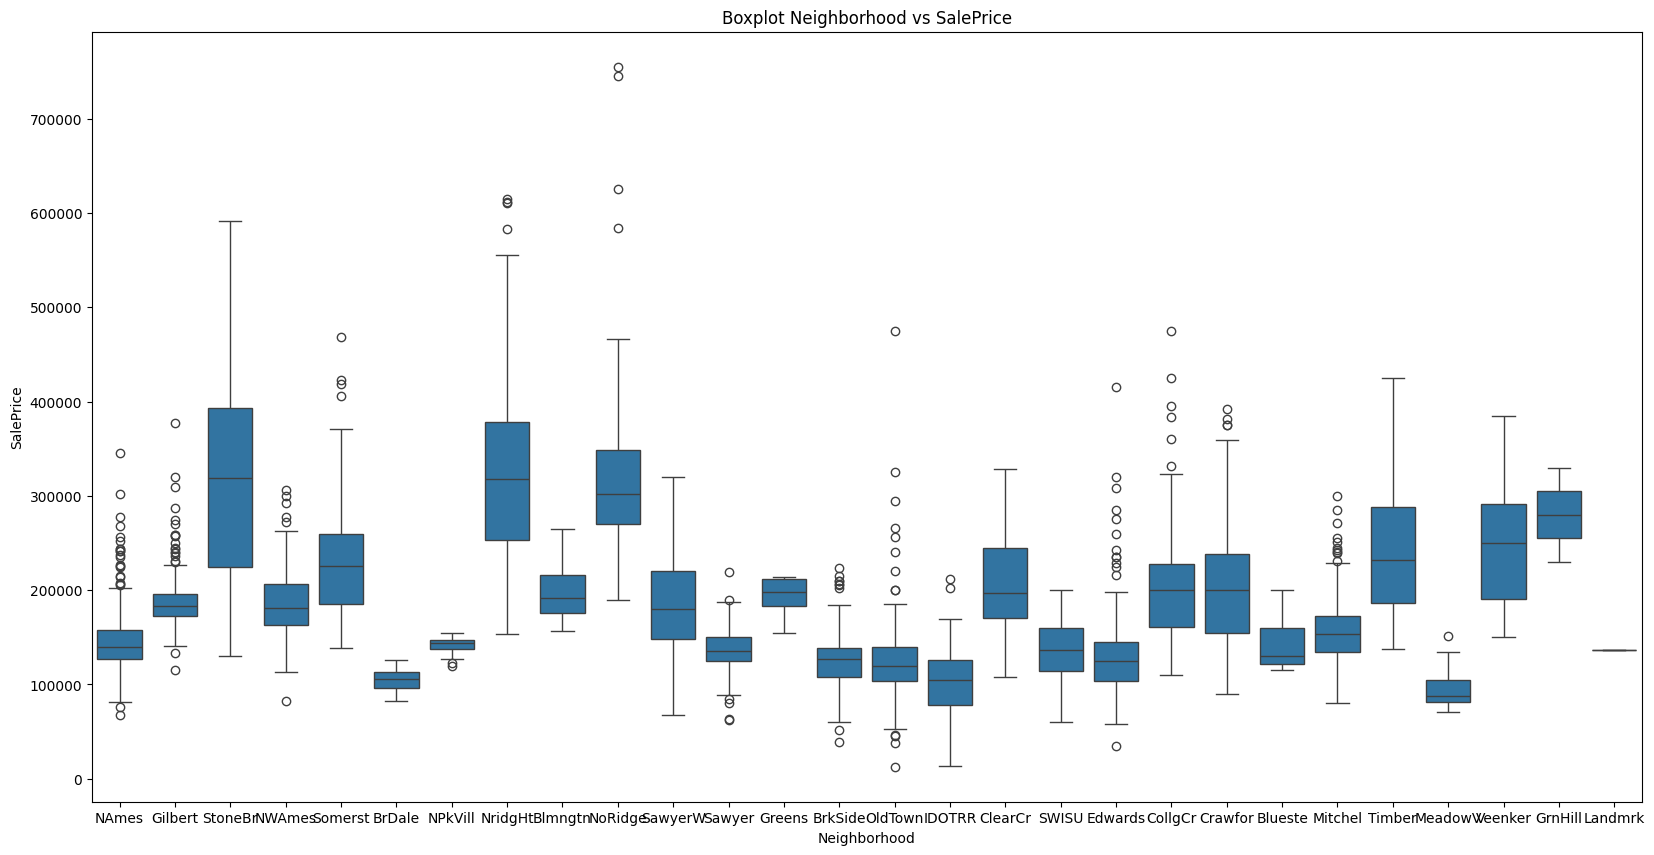

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Boxplot Neighborhood vs SalePrice')
sns.boxplot( x='Neighborhood', y='SalePrice', data=leaked_data )
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.show()

In [ ]:
len(leaked_data)

2928

In [ ]:
#Creando la nueva columna categoria de la casa
for i in leaked_data.index:
  if leaked_data.loc[i, 'SalePrice'] <= 250000:
    leaked_data.loc[i, 'Categoria de la casa'] = 'Bajo'
  elif 250000 < leaked_data.loc[i, 'SalePrice'] <= 500000:
    leaked_data.loc[i, 'Categoria de la casa'] = 'Medio'
  else:
    leaked_data.loc[i, 'Categoria de la casa'] = 'Alto'
leaked_data.head(5)

<ipython-input-13-d303af52ca25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaked_data.loc[i, 'Categoria de la casa'] = 'Bajo'


,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Full Bath,Year Built,Lot Area,Neighborhood,Categoria de la casa
0,215000,6,1656,528.0,1080.0,1,1960,31770,NAmes,Bajo
1,105000,5,896,730.0,882.0,1,1961,11622,NAmes,Bajo
2,172000,6,1329,312.0,1329.0,1,1958,14267,NAmes,Bajo
3,244000,7,2110,522.0,2110.0,2,1968,11160,NAmes,Bajo
4,189900,5,1629,482.0,928.0,2,1997,13830,Gilbert,Bajo


In [ ]:
leaked_data['Lot Area'] = pd.to_numeric(leaked_data['Lot Area'], errors='coerce')

leaked_data['Lot Area'].max()

<ipython-input-14-924ccbf5c516>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaked_data['Lot Area'] = pd.to_numeric(leaked_data['Lot Area'], errors='coerce')


215245

In [ ]:
# Creando la variable Tamaño de la casa
for i in leaked_data.index:
  if leaked_data.loc[i, 'Lot Area'] <= 50000:
    leaked_data.loc[i, 'Tamaño de la casa'] = 'Pequeña'
  elif 50000 < leaked_data.loc[i, 'Lot Area'] <= 150000:
    leaked_data.loc[i, 'Tamaño de la casa'] = 'Mediana'
  else:
    leaked_data.loc[i, 'Tamaño de la casa'] = 'Grande'
leaked_data.head(3)

<ipython-input-15-ced3e5d99ede>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaked_data.loc[i, 'Tamaño de la casa'] = 'Pequeña'


,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Full Bath,Year Built,Lot Area,Neighborhood,Categoria de la casa,Tamaño de la casa
0,215000,6,1656,528.0,1080.0,1,1960,31770,NAmes,Bajo,Pequeña
1,105000,5,896,730.0,882.0,1,1961,11622,NAmes,Bajo,Pequeña
2,172000,6,1329,312.0,1329.0,1,1958,14267,NAmes,Bajo,Pequeña


In [ ]:
leaked_data['Year Built'].min()

1872

In [ ]:
# Creando la variable Antiguedad de la casa
for i in leaked_data.index:
  if leaked_data.loc[i, 'Year Built'] <= 1920:
    leaked_data.loc[i, 'Antiguedad de la casa'] = 'Antigua'
  elif 1920 < leaked_data.loc[i, 'Year Built'] <= 1980:
    leaked_data.loc[i, 'Antiguedad de la casa'] = 'Moderna'
  else:
    leaked_data.loc[i, 'Antiguedad de la casa'] = 'Nueva'
leaked_data.head(3)

<ipython-input-17-05f75c9edd2d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leaked_data.loc[i, 'Antiguedad de la casa'] = 'Moderna'


,SalePrice,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Full Bath,Year Built,Lot Area,Neighborhood,Categoria de la casa,Tamaño de la casa,Antiguedad de la casa
0,215000,6,1656,528.0,1080.0,1,1960,31770,NAmes,Bajo,Pequeña,Moderna
1,105000,5,896,730.0,882.0,1,1961,11622,NAmes,Bajo,Pequeña,Moderna
2,172000,6,1329,312.0,1329.0,1,1958,14267,NAmes,Bajo,Pequeña,Moderna


# **Regresion random forest**





In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X=leaked_data.drop(['SalePrice','Categoria de la casa','Tamaño de la casa','Antiguedad de la casa','Neighborhood'], axis=1)
y=leaked_data['SalePrice']


In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X)
X

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Full Bath,Year Built,Lot Area
0,6,1656,528.0,1080.0,1,1960,31770
1,5,896,730.0,882.0,1,1961,11622
2,6,1329,312.0,1329.0,1,1958,14267
3,7,2110,522.0,2110.0,2,1968,11160
4,5,1629,482.0,928.0,2,1997,13830
...,...,...,...,...,...,...,...
2925,6,1003,588.0,1003.0,1,1984,7937
2926,5,902,484.0,864.0,1,1983,8885
2927,5,970,0.0,912.0,1,1992,10441
2928,5,1389,418.0,1389.0,1,1974,10010


In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamiento del modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#prediccion y evaluacion
y_pred = model.predict(X_test)
#evaluacion del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Puntuacion entrenamiento:", model.score(X_train,y_train))
print("Puntuacion prueba", model.score(X_test,y_test))


Mean Absolute Error: 17634.267356379212
Mean Squared Error: 748758867.4092299
Root Mean Squared Error: 27363.4586156288
Puntuacion entrenamiento: 0.9797550225443226
Puntuacion prueba 0.9089234720397799


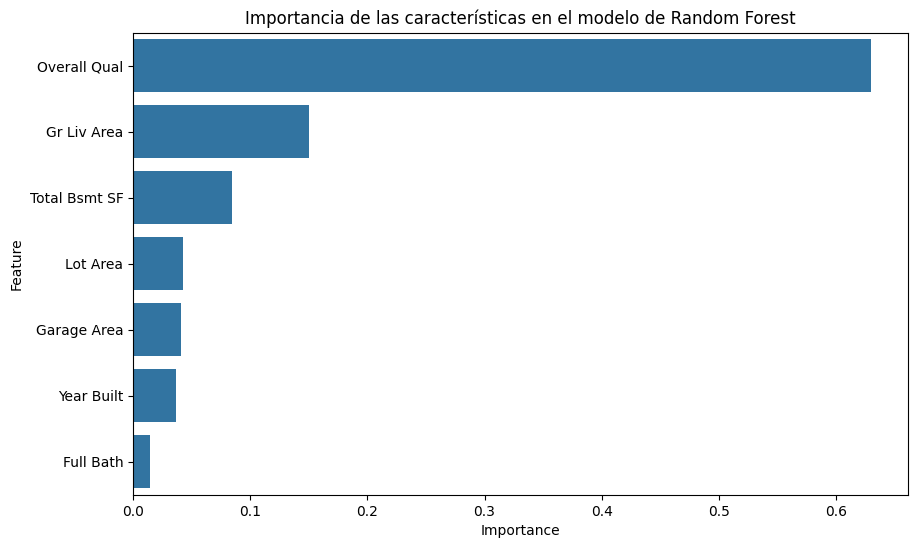

In [ ]:
# Importancia de las características en Random Forest
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Importancia de las características en el modelo de Random Forest")
plt.show()

In [ ]:
elemento_de_prueba= [6,	1656,	528.0,	1080.0,	1,	1960,	31770]

In [ ]:
#215000	6	1656	528.0	1080.0	1	1960	31770
print(model.predict([elemento_de_prueba]))

[209876.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


***Busqueda por reticula***

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#numero de arboles en el bosque
n_estimators=[50,100,150,200]

#numero de caracteristicas a considerar
max_features=['sqrt','log2']

#criterio
criterion=['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

#maximo numero de niveles en el arbol (NUMERO DE HOJAS FINALES)
max_depth=[5,10,15,20]

param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'criterion':criterion,
            'max_depth':max_depth}

In [ ]:
random_forest=RandomForestRegressor()
#Busqueda exhaustiva es
grid_search=GridSearchCV(estimator=random_forest,
                         param_grid=param_grid,
                         scoring='accuracy',
                         refit=True,
                         cv=5,
                         n_jobs=-1,
                         verbose=2)

In [ ]:
#ajustar al modelo
gs=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


In [ ]:
best_e=gs.best_estimator_
#mejor modelo
print(f'Mejor puntaje: {gs.best_score_} ')
print(f'Mejores parametros: {gs.best_params_} ')
print(f'Mejores estimadores:  {best_e}')

Mejor puntaje: nan 
Mejores parametros: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50} 
Mejores estimadores:  RandomForestRegressor(max_depth=5, max_features='sqrt', n_estimators=50)



# ***Regresion Lineal***


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X=leaked_data.drop(['SalePrice','Categoria de la casa','Tamaño de la casa','Antiguedad de la casa','Neighborhood'], axis=1)
y=leaked_data['SalePrice']

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(X)
reg=LinearRegression()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
Y_pred=reg.predict(X_test)

In [ ]:
#evaluacion del modelo
mae_lin = mean_absolute_error(y_test, y_pred)
mse_lin = mean_squared_error(y_test, y_pred)
rmse_lin = np.sqrt(mse)
print("Mean Absolute Error:", mae_lin)
print("Mean Squared Error:", mse_lin)
print("Root Mean Squared Error:", rmse_lin)
print("Puntuacion:", reg.score(X,y))

Mean Absolute Error: 82101.52762465985
Mean Squared Error: 12500496431.076557
Root Mean Squared Error: 27363.4586156288
Puntuacion: 0.7935803482097977


# ***Regresion Ridge, Lasso***